### Process all pairs (every 2 frames)

In [5]:
import openpiv.tools
import openpiv.process
import openpiv.scaling
import openpiv.validation
import openpiv.filters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from skimage import img_as_int

In [4]:
#--------------------------------------------------------------------------------------------------------
#
### Process all frame pairs (every 2 frames)
#
#--------------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------------

# INPUT:

# initial frame to process (int)
ini_frame = 
# last frame to porcess (int)
end_frame = 
# pix/cm, get this scale from reference image
sca_factor = 69.4686 
# directory where frames are
frame_dir = '/ocean/kramosmu/MultipleCanyons/lab/PIV/experiments/exp_13jun19/frames' 
# filename format of frame files
frame_format = 'run01_%s.jpg' 
# directory to save velocity data files
vel_dir = '/ocean/kramosmu/MultipleCanyons/lab/PIV/experiments/exp_13jun19/velocity'
 # filename format for velocity files
vel_format = 'run01_%s.txt'

# Correlation processing parameters
window_size = 32
overlap = 16
dt = 5/30
search_area_size = 48
thresh = 1.3 # signal to noise threshold

#--------------------------------------------------------------------------------------------------------

for ii in range(ini_fame,end_frame,2):

    fr_num_a = ('%04d' %ii)
    fr_num_b = ('%04d' %(ii+2))
    
    file_a = (frame_dir+frame_format %fr_num_a)
    file_b = (frame_dir+frame_format %fr_num_b)
    
    fr_a  = openpiv.tools.imread(file_a)
    fr_b  = openpiv.tools.imread(file_b)
    
    frame_a_int = img_as_int(1-fr_a)
    frame_b_int = img_as_int(1-fr_b)
    
    fra = frame_a_int[200:,500:1700].astype(np.int32) # crop images
    frb = frame_b_int[200:,500:1700].astype(np.int32)

    u, v, sig2noise = openpiv.process.extended_search_area_piv(fra, frb,
                                                               window_size, 
                                                               overlap=overlap, 
                                                               dt=dt, 
                                                               search_area_size=search_area_size, 
                                                               sig2noise_method='peak2peak')
    x, y = openpiv.process.get_coordinates(image_size=fra.shape, window_size=window_size, overlap=overlap)
    umask, vmask, mask = openpiv.validation.sig2noise_val(u, v, sig2noise, threshold = thresh)
    uval, vval, mask = openpiv.validation.global_val(umask, vmask, (-5000, 5000), (-5000, 5000))
    xsca, ysca, usca, vsca = openpiv.scaling.uniform(x, y, uval, vval, scaling_factor = sca_factor )

    openpiv.tools.save(xsca, ysca, usca, vsca, mask, (vel_dir + vel_format %fr_num_a)


SyntaxError: invalid syntax (<ipython-input-4-1a6c8c01a9ed>, line 22)

In [1]:
import matplotlib.pyplot as plt

In [11]:
filename = '/ocean/kramosmu/MultipleCanyons/lab/PIV/experiments/exp_13jun19/velocity/run01_0005.txt'

/home/kramosmu/anaconda3/lib/python3.5/site-packages/openpiv/tools.py:80: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  pl.hold(True)
/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:901: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/quiver.py:650: RuntimeWarning: Mean of empty slice.
  amean = a.mean()


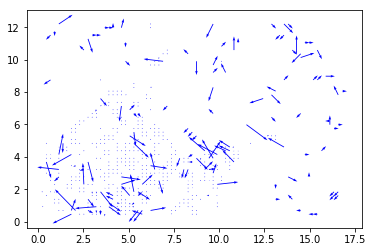

In [12]:
openpiv.tools.display_vector_field(filename, width=0.0025)
